In [1]:
'''
Due to the results on the previous experiments the following will be attempted:
- Extract features from all data instance form dataset and store them into a folder
    - 2048 Feature to be extracted with ResNet50 and stored
        - on behavior 
        - on emotion (this notebook)
    - 2048 Features to be extracted with Inception ?
-Load them and train a SVM on their Features
'''


'\nDue to the results on the previous experiments the following will be attempted:\n- Extract features from all data instance form dataset and store them into a folder\n    - 2048 Feature to be extracted with ResNet50 and stored\n        - on behavior \n        - on emotion (this notebook)\n    - 2048 Features to be extracted with Inception ?\n-Load them and train a SVM on their Features\n-Evaluate the model with the UMN dataset \n    - here the clasiffication will be binay\n        -normal label cover the following MED labels: \n        -abnormal label cover the following MED labels:\n'

# Extracting behavior features with ResNet50 pre-trained model  
### Re-evaluation - training data

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import PIL
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import h5py
from pickle import dump

## Loading and visualising frames 

4872


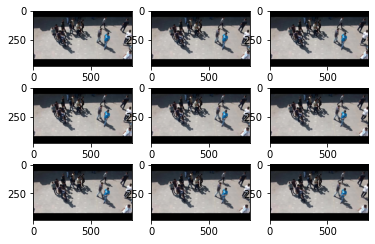

In [3]:
emotion = pd.read_csv('data/MotionEmotion/reduced_emo_labelled_dataset.csv')
emotion = emotion.rename(columns={'Unnamed: 0':'org_idx'}) 
paths = emotion.path
label = emotion.label
print(len(paths))
for i in range(9):
    plt.subplot(330 + 1 + i)
    #print(file_list[i])
    filename = paths[i]
    image = imread(filename)
    plt.imshow(image)

In [4]:
image = Image.open(paths[1])
print(image.format) 
data = asarray(image) #converting image into array
print(data.shape)

JPEG
(480, 854, 3)


## Feeding feature extractor with images 
### Specifications: 

Model: ResNet50 - pretrained

Weights: Imagnet

Input: 224,224 

Output: 1, 2048

    Which are the number of features extracted per frame. The last FC layer which carries out the classification 
    is not being used. 
    Layer: avg_pool (GlobalAveragePooling2D) output shape:(none, 2048) # of params: 0 connected to
       ['conv5_block3_out[0][0]']  
 

In [5]:
def feature_extraction(images):
    paths = images
    features = []
    for image in paths: 
        images_ = load_img(image, target_size=(224, 224))
        # convert the image pixels to a numpy array
        images_ = img_to_array(images_)
        # reshape data for the model
        images_ = images_.reshape((1, images_.shape[0], images_.shape[1], images_.shape[2])) # prepare the image for the model
        images_ = preprocess_input(images_)
        # load model
        model = ResNet50(weights="imagenet") #include_top=False?
        #model.summary()
        # remove the output layer
        model = Model(inputs=model.inputs, outputs=model.layers[-2].output) #add batch size?
        #model.summary()
        # get extracted features
        features_ = model.predict(images_)
        print(features_.shape)
        features.append(features_)
    model.summary()
    return features

In [6]:
extracted_features = feature_extraction(paths)

2022-04-26 15:41:52.952312: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
Model: "mo

                                                                                                  
 conv2_block2_add (Add)         (None, 56, 56, 256)  0           ['conv2_block1_out[0][0]',       
                                                                  'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, 56, 56, 256)  0           ['conv2_block2_add[0][0]']       
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16448       ['conv2_block2_out[0][0]']       
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block2_add (Add)         (None, 28, 28, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_block2_out (Activation)  (None, 28, 28, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_block3_1_conv (Conv2D)   (None, 28, 28, 128)  65664       ['conv3_block2_out[0][0]']       
                                                                                                  
 conv3_block3_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization)                                                                                         
          

 conv4_block1_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block1_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_add (Add)         (None, 14, 14, 1024  0           ['conv4_block1_0_bn[0][0]',      
                                )                                 'conv4_block1_3_bn[0][0]']      
                                                                                                  
 conv4_block1_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block1_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block1_out[0][0]']       
          

                                                                                                  
 conv4_block4_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block4_add (Add)         (None, 14, 14, 1024  0           ['conv4_block3_out[0][0]',       
                                )                                 'conv4_block4_3_bn[0][0]']      
                                                                                                  
 conv4_block4_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block4_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block1_2_relu[0][0]']    
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block1_0_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_3_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block1_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_0_bn[0][0]',      
          

In [8]:
len(extracted_features)

4872

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy
train_features = np.array(extracted_features).reshape(len(extracted_features) ,-1) 
train_features = StandardScaler().fit_transform(train_features)

#test_features = np.array(test_features).reshape(len(test_features) ,-1) 
#test_features = StandardScaler().fit_transform(test_features)
len(train_features)
train_features[1].dtype

dtype('float32')

### Saving extracted features as csv files

In [16]:
from numpy import savetxt
k=0 
for i in train_features:
    print(i)
    k +=1
    #print(j)
    #savetxt('data/all_features/ResNet_emo/data'+ str(k) +'.csv', i, delimiter=',')
    


[-0.47881606 -0.70842886 -0.44716722 ... -0.07608295  1.7612116
 -0.7716563 ]
[-0.7201624  -0.6594142  -0.56810725 ... -0.0664997   1.2897929
 -0.5847645 ]
[-0.57593906 -0.5572718  -0.56810725 ... -0.25502387  1.6933606
 -0.4983257 ]
[-0.5162098  -0.9175636  -0.56810725 ...  0.04336068  0.8637936
 -0.65180254]
[-0.56737834 -0.7445912  -0.56810725 ... -0.03300497  1.4316226
 -0.37514472]
[-0.60232645 -0.57720894 -0.56810725 ...  0.22693501  0.9828799
 -0.9745887 ]
[-0.73851687 -0.91723466 -0.56810725 ...  0.5699401   3.7473423
 -0.9486238 ]
[-0.6139993  -0.8429957  -0.56810725 ...  0.21927024  2.0420778
 -0.6852176 ]
[-0.9290992  -0.91735274 -0.56810725 ...  0.15804577  4.241282
 -0.887632  ]
[-0.9077496  -0.60571563 -0.56810725 ...  0.47350878  2.23721
 -0.80344874]
[-1.0307143  -0.5559223  -0.5392722  ...  0.7058833   1.5980482
 -0.72762346]
[-0.8933176  -0.56801045 -0.4849909  ...  1.0194407   1.2126436
 -0.8973188 ]
[-1.1610466  -0.30396634 -0.56810725 ...  0.7055921   1.1915659
 -0